In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
df_lanes = pd.read_csv(
    "../agv_ns_ros/data/AGV_Map/LaneMap-20241015.csv",
    names="index x_begin y_begin x_end y_end".split(),
    index_col=0,
)
df_lanes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 1 to 46
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x_begin  46 non-null     float64
 1   y_begin  46 non-null     float64
 2   x_end    46 non-null     float64
 3   y_end    46 non-null     float64
dtypes: float64(4)
memory usage: 1.8 KB


In [5]:
df_transponders = pd.read_csv(
    "../agv_ns_ros/data/AGV_Map/TransMap-20240902.csv",
    names="index x y lane_1 lane_2".split(),
    index_col=0,
)
df_transponders["x"] = df_transponders["x"] / 1000
df_transponders["y"] = df_transponders["y"] / 1000
df_transponders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 962 entries, 1 to 962
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       962 non-null    float64
 1   y       962 non-null    float64
 2   lane_1  962 non-null    int64  
 3   lane_2  962 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 37.6 KB


In [6]:
df_lanes.loc[25]

x_begin    582.000
y_begin    109.656
x_end      602.000
y_end      109.656
Name: 25, dtype: float64

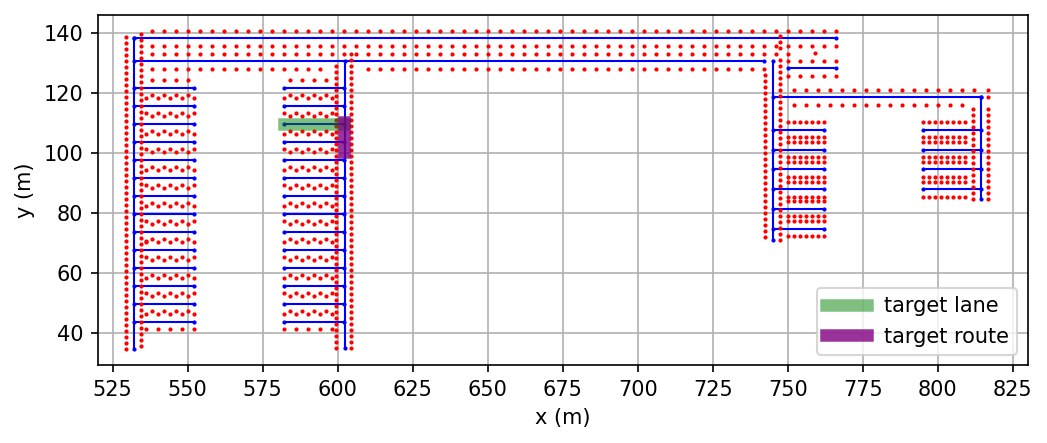

In [9]:
fig = plt.figure(figsize=(8, 6), dpi=150)
fig.set_facecolor("#fff")
ax = fig.add_subplot()

for index in df_lanes.index:
    ax.plot(
        [df_lanes.loc[index, "x_begin"], df_lanes.loc[index, "x_end"]],  # type: ignore
        [df_lanes.loc[index, "y_begin"], df_lanes.loc[index, "y_end"]],  # type: ignore
        "b.-",
        lw=1,
        ms=2,
    )

ax.plot(
    df_transponders["x"],
    df_transponders["y"],
    "r.",
    ms=2,
)

# target lane
ax.plot(
    [df_lanes.loc[25]["x_begin"], df_lanes.loc[25]["x_end"]],
    [df_lanes.loc[25]["y_begin"], df_lanes.loc[25]["y_end"]],
    "-",
    color="green",
    lw=6,
    alpha=0.5,
    label="target lane",
)

# target route
ax.plot(
    [602.13, 602.13],
    [100.24, 110.24],
    "-",
    color="purple",
    lw=6,
    alpha=0.8,
    label="target route",
)

ax.set(
    xlabel="x (m)",
    ylabel="y (m)",
    # xlim=(575, 625),
    # ylim=(95, 115),
    xlim=(520, 830),
    xticks=np.arange(525, 826, 25),
    aspect="equal",
)

ax.legend()
ax.grid()